In [4]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
import pandas as pd
import seaborn as sb
import time

import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [6]:
import torch.utils
import torch.utils.data

trainset = datasets.MNIST('.//datasets//mnist_nb',download=True,train=True,transform=transform)
valset = datasets.MNIST('.//datasets//mnist_nb',download=True,train=False,transform=transform)

train_loader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
val_loader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.__next__()

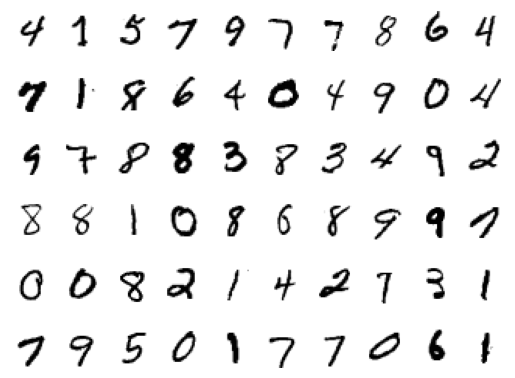

In [8]:
figure = plt.figure()
num_images = 60
for index in range(1,num_images+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap='gray_r')

In [9]:
input_node_size = 784
hidden_node_sizes = [128,64]
out_node_size = 10

model = nn.Sequential(
                        nn.Linear(input_node_size, hidden_node_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_node_sizes[0],hidden_node_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_node_sizes[1],out_node_size),
                        nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [10]:
criterion = nn.NLLLoss()
images,labels = next(iter(train_loader))
images = images.view(images.shape[0],-1)

logps = model(images)
loss = criterion(logps,labels)

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time.time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time.time()-time0)/60)

Epoch 0 - Training loss: 0.6432725768814336
Epoch 1 - Training loss: 0.28538371648774474
Epoch 2 - Training loss: 0.2201372803445024
Epoch 3 - Training loss: 0.179963191000145
Epoch 4 - Training loss: 0.1507553396555883
Epoch 5 - Training loss: 0.12892022529549435
Epoch 6 - Training loss: 0.11288223979271837
Epoch 7 - Training loss: 0.10109914477858971
Epoch 8 - Training loss: 0.08794600096221433
Epoch 9 - Training loss: 0.08021079568412783
Epoch 10 - Training loss: 0.07350012181159943
Epoch 11 - Training loss: 0.06828564394296192
Epoch 12 - Training loss: 0.06282134145410902
Epoch 13 - Training loss: 0.05716405179463764
Epoch 14 - Training loss: 0.05243314899378089

Training Time (in minutes) = 5.509600909550985


Predicted Digit = 2


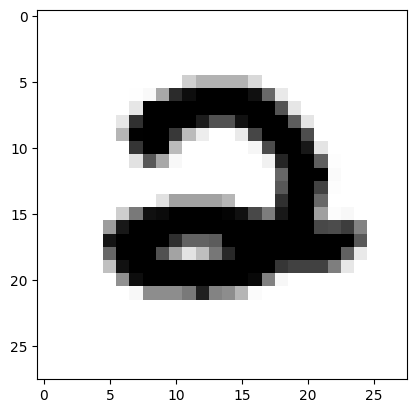

In [12]:
images, labels = next(iter(val_loader))
s = images[16].reshape((28,28))
plt.imshow(s,cmap='gray_r')
img = images[16].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))



In [13]:
sample_input = torch.randn(1,784)
output = model(sample_input)


In [14]:
from torchviz import make_dot

In [15]:
dot = make_dot(output, params=dict(model.named_parameters()))

In [17]:
dot.format = 'png'
dot.render("MNIST_NETEORK")

'MNIST_NETEORK.png'